## 1.1 Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import re
import spacy
import unicodedata
import nltk
import joblib
import utils as utils

from sklearn.linear_model import LinearRegression
from sklearn import tree

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics

from sklearn import ensemble
from sklearn import naive_bayes
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

## 1.2 Installing the toolkit for processing natural language

In [2]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')

# 2. Loading data

In [3]:
data = pd.read_csv(r'flipkart_com-ecommerce_sample.csv')
data.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


# 3. Data preprocessing

## 3.1 Information of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

## 3.2 Checking for NULL values

In [5]:
data.isna().sum()

uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data.isna().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

## 3.3 Checking for the data types

In [8]:
data.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product     object
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

# 4. Text data processing

## 4.1 Stopwords

In [9]:
stopwords = stopwords.words('english')
unnecessary_stopwords = {'no', 'nor', 'not', 'ain', 'aren', "aren't", 'couldn', 'what', 'which', 'who',
                                      'whom',
                                      'why', 'how', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't",
                                      'hasn',
                                      "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                                      "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                                      "wasn't",
                                      'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'don', "don't"}

stopwords = [i for i in stopwords if i not in unnecessary_stopwords]
lemma = WordNetLemmatizer()
nouns = ['NNP', 'NNPS']
nlp = spacy.load('en_core_web_sm')
labelencoder = LabelEncoder()

## 4.1 Label extraction

__Spliting the "product_category_tree" column usiung ">>" as the separator to add a column namely "Labels" in the dataset__

In [10]:
def extract_labels(data, top=5):
    data['Labels'] = data['product_category_tree'].apply(lambda x: x.split('>>')[0][2:].strip())
    top_items = list(data.groupby('Labels').count().sort_values(by='uniq_id',ascending=False).head(top).index)
    data = data[data['Labels'].isin(top_items)]
    return data
    
data = extract_labels(data, top=10)
data.Labels.value_counts()

Jewellery                     3521
Clothing                      3129
Mobiles & Accessories         1096
Automotive                    1010
Home Decor & Festive Needs     859
Home Furnishing                698
Computers                      572
Baby Care                      455
Tools & Hardware               387
Footwear                       375
Name: Labels, dtype: int64

## 4.2 Cleaning text data

In [11]:
def text_cleaner(text, remove_stopwords=True, lemmatize=True):
    # removing mailing addresses 
    text = re.sub('\S*@\S*\s?', '', text)
    # Remove new line characters 
    text = re.sub('\s+', ' ', text) 
    # Remove distracting single quotes 
    text = re.sub("\'", '', text)

    # cleaning the puntuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)

    # removing single characters
    text = re.sub('\s+[a-zA-Z]\s+^I', ' ', text)
    # removing accented words
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # removing multiple spaces
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'^\s*|\s\s*', ' ', text).strip()
    text = text.lower()

    if not remove_stopwords and not lemmatize:
        return text

    # removing unncecessay stopwords
    if remove_stopwords:
        text = word_tokenize(text)
        text = " ".join([word for word in text if word not in stopwords])
        # Word lemmatization
        if lemmatize:
            text = nlp(text)
            lemmatized_text = []
            for word in text:
                if word.lemma_.isalpha():
                    if word.lemma_ != '-PRON-':
                        lemmatized_text.append(word.lemma_.lower())
                        text = " ".join([word.lower() for word in lemmatized_text])
                        
                        return text

## 4.3 Featuring Scaling

In [12]:
def ct_vectorize(x_train, x_test, analyzer='word', token_pattern=r'\w{1,}', max_features=10000, ngram_range=(1,1)):
    if analyzer == 'word':
        cvector = CountVectorizer(analyzer=analyzer, 
                                  token_pattern=token_pattern,
                                  max_features=max_features,
                                  ngram_range=ngram_range)
    else:
        cvector = CountVectorizer(analyzer=analyzer, 
                                      max_features=max_features,
                                      ngram_range=ngram_range)
    cvector.fit(x_train)

    # transform the training and validation data using count vectorizer object
    count_xtrain = cvector.transform(x_train)
    count_xvalid = cvector.transform(x_test)

    return count_xtrain, count_xvalid

In [13]:
def tfidf_vectorize(x_train, x_test, analyzer='word', token_pattern=r'\w{1,}', max_features=10000, ngram_range=(1,1)):
    if analyzer == 'word':
        tfidfvector = TfidfVectorizer(analyzer=analyzer, 
                                     token_pattern=token_pattern,
                                     max_features=max_features,
                                     ngram_range=ngram_range)
    else:
        tfidfvector = TfidfVectorizer(analyzer=analyzer, 
                                         max_features=max_features,
                                         ngram_range=ngram_range)
    tfidfvector.fit(x_train)

    xtrain_tfidf = tfidfvector.transform(x_train)
    xvalid_tfidf = tfidfvector.transform(x_test)

    return xtrain_tfidf, xvalid_tfidf

## 4.4 Preparing data for model training

In [14]:
def data_preparation(data, test_size=0.3, remove_stopwords=True, lemmatize=True):
    data = data.sample(frac=1).reset_index(drop=True)
    des = data['description'].apply(lambda x: text_cleaner(str(x), remove_stopwords=remove_stopwords, lemmatize=lemmatize))
    Lablels = data['Labels'].values.tolist()
    Lablels = labelencoder.fit_transform(Lablels)
    x_train, x_test, y_train, y_test = train_test_split(des, 
                                                        Lablels, 
                                                        test_size=test_size, 
                                                        stratify=Lablels)
    return x_train, x_test, y_train, y_test

## 4.5 Train-Test Split (70%-30%)

In [15]:
x_train, x_test, y_train, y_test = data_preparation(data, test_size=0.3, remove_stopwords=True, lemmatize=True)

print("Total training examples: ", len(x_train))
print("Total test examples: ", len(x_test))

Total training examples:  8471
Total test examples:  3631


## 4.6 Feature generation

In [16]:
# Word frequency based representation (only unigrams)
xtrain_count, xvalid_count = ct_vectorize(x_train, x_test, analyzer='word', token_pattern=r'\w{1,}', 
                                          max_features=10000, ngram_range=(1,1))

# Word frequency based representation (unigrams and bigrams)
xtrain_count_freq1, xvalid_count_freq1 = ct_vectorize(x_train, x_test, analyzer='word', token_pattern=r'\w{1,}', 
                                                      max_features=10000, ngram_range=(1,2))

xtrain_count_freq2, xvalid_count_freq2 = ct_vectorize(x_train, x_test, analyzer='word', token_pattern=r'\w{1,}', 
                                                      max_features=10000, ngram_range=(1,3))


xtrain_tfidf, xvalid_tfidf = tfidf_vectorize(x_train, x_test, analyzer='word', token_pattern=r'\w{1,}', 
                                             max_features=10000, ngram_range=(1,1))


xtrain_tfidf_freq1, xvalid_tfidf_freq1 = tfidf_vectorize(x_train, x_test, analyzer='word', token_pattern=r'\w{1,}', 
                                                         max_features=10000, ngram_range=(1,2))


xtrain_tfidf_freq2, xvalid_tfidf_freq2 = tfidf_vectorize(x_train, x_test, analyzer='word', token_pattern=r'\w{1,}', 
                                                         max_features=10000, ngram_range=(1,3))

xtrain_tfidf_freq2_str, xvalid_tfidf_freq2_str = tfidf_vectorize(x_train, x_test, analyzer='char', token_pattern=r'\w{1,}', 
                                                                 max_features=10000, ngram_range=(2,3))
print("\nFeatures generated!")


Features generated!


# 5. Statistical Analysis

In [17]:
d = data

In [18]:
d[['uniq_id']] = d[['uniq_id']].apply(lambda col: pd.Categorical(col).codes)
d[['product_url']] = d[['product_url']].apply(lambda col: pd.Categorical(col).codes)
d[['product_name']] = d[['product_name']].apply(lambda col: pd.Categorical(col).codes)
d[['product_category_tree']] = d[['product_category_tree']].apply(lambda col: pd.Categorical(col).codes)
d[['pid']] = d[['pid']].apply(lambda col: pd.Categorical(col).codes)
d[['image']] = d[['image']].apply(lambda col: pd.Categorical(col).codes)
d[['is_FK_Advantage_product']] = d[['is_FK_Advantage_product']].apply(lambda col: pd.Categorical(col).codes)
d[['description']] = d[['description']].apply(lambda col: pd.Categorical(col).codes)
d[['product_rating']] = d[['product_rating']].apply(lambda col: pd.Categorical(col).codes)
d[['overall_rating']] = d[['overall_rating']].apply(lambda col: pd.Categorical(col).codes)
d[['brand']] = d[['brand']].apply(lambda col: pd.Categorical(col).codes)
d[['product_specifications']] = d[['product_specifications']].apply(lambda col: pd.Categorical(col).codes)

## 5.1 Description of data

In [19]:
d.describe()

,uniq_id,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
count,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000,12102.000000
mean,6050.500000,6050.500000,3807.754751,2060.016278,6049.042555,3621.638820,2381.432243,5404.156007,0.025285,5133.405718,32.239712,32.239712,1295.212031,5909.553958
std,3493.690813,3493.690813,2045.671997,1038.791261,3493.106665,8437.745234,6455.940044,3161.993930,0.156996,3030.729360,4.016798,4.016798,773.706251,3393.368524
min,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3025.250000,3025.250000,2085.000000,1246.000000,3024.250000,699.000000,350.000000,2571.250000,0.000000,2494.250000,33.000000,33.000000,607.000000,2954.250000
50%,6050.500000,6050.500000,3735.000000,2469.500000,6048.500000,1149.000000,549.000000,5443.500000,0.000000,4997.500000,33.000000,33.000000,1265.000000,5973.500000
75%,9075.750000,9075.750000,5606.750000,2941.000000,9073.750000,2199.000000,1200.000000,8073.750000,0.000000,7886.750000,33.000000,33.000000,2011.000000,8845.750000
max,12101.000000,12101.000000,7252.000000,3347.000000,12099.000000,116292.000000,116292.000000,10924.000000,1.000000,10264.000000,33.000000,33.000000,2601.000000,11617.000000


## 5.2 Correlation

In [20]:
d.corr().abs()

,uniq_id,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,1.000000,0.000734,0.002891,0.007983,0.007281,0.020501,0.020467,0.007130,0.005163,0.009680,0.000503,0.000503,0.000681,0.002864
product_url,0.000734,1.000000,0.934848,0.097472,0.020175,0.041806,0.027527,0.021541,0.035840,0.663922,0.013191,0.013191,0.814515,0.081707
product_name,0.002891,0.934848,1.000000,0.107389,0.025211,0.052476,0.038332,0.018844,0.030950,0.683888,0.010182,0.010182,0.879655,0.095616
product_category_tree,0.007983,0.097472,0.107389,1.000000,0.203795,0.169690,0.189493,0.050115,0.061636,0.024494,0.013947,0.013947,0.088948,0.029792
pid,0.007281,0.020175,0.025211,0.203795,1.000000,0.146026,0.157681,0.454537,0.047231,0.054600,0.011900,0.011900,0.061890,0.305964
retail_price,0.020501,0.041806,0.052476,0.169690,0.146026,1.000000,0.988352,0.057804,0.025900,0.063415,0.039071,0.039071,0.061762,0.009303
discounted_price,0.020467,0.027527,0.038332,0.189493,0.157681,0.988352,1.000000,0.066392,0.020659,0.050882,0.036677,0.036677,0.047034,0.018906
image,0.007130,0.021541,0.018844,0.050115,0.454537,0.057804,0.066392,1.000000,0.017929,0.040291,0.008363,0.008363,0.034760,0.149141
is_FK_Advantage_product,0.005163,0.035840,0.030950,0.061636,0.047231,0.025900,0.020659,0.017929,1.000000,0.025768,0.142489,0.142489,0.014560,0.032021
description,0.009680,0.663922,0.683888,0.024494,0.054600,0.063415,0.050882,0.040291,0.025768,1.000000,0.038297,0.038297,0.557876,0.093513



1. Score:
 0.7737920418324518

2. Model Coefficient:
 [[0.33269957]]

3. Model Intercept:
 [28.37367674]

4. Predictions made:
 [[159.79000543]
 [ 78.27861169]
 [159.79000543]
 ...
 [714.73288202]
 [714.73288202]
 [714.73288202]]



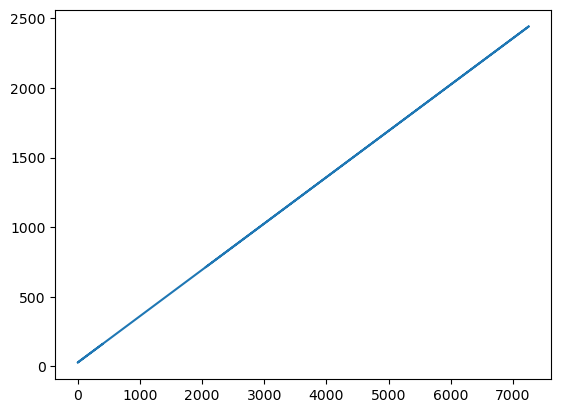

In [21]:
x = np.array(d['product_name']).reshape(-1, 1)
y = np.array(d['brand']).reshape(-1, 1)

linearmodel = LinearRegression().fit(x, y)

print("\n====================================")
print('1. Score:\n', linearmodel.score(x, y))
print("\n====================================")
print('2. Model Coefficient:\n', linearmodel.coef_)
print("\n====================================")
print('3. Model Intercept:\n',linearmodel.intercept_)
print("\n====================================")
print('4. Predictions made:\n',linearmodel.predict(x))
print("\n====================================")

plt.plot(x, linearmodel.predict(x))

# 6. Data Visualization

## 6.1 Visualizing the frequencies of the occurences of the labeled products in the dataset

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

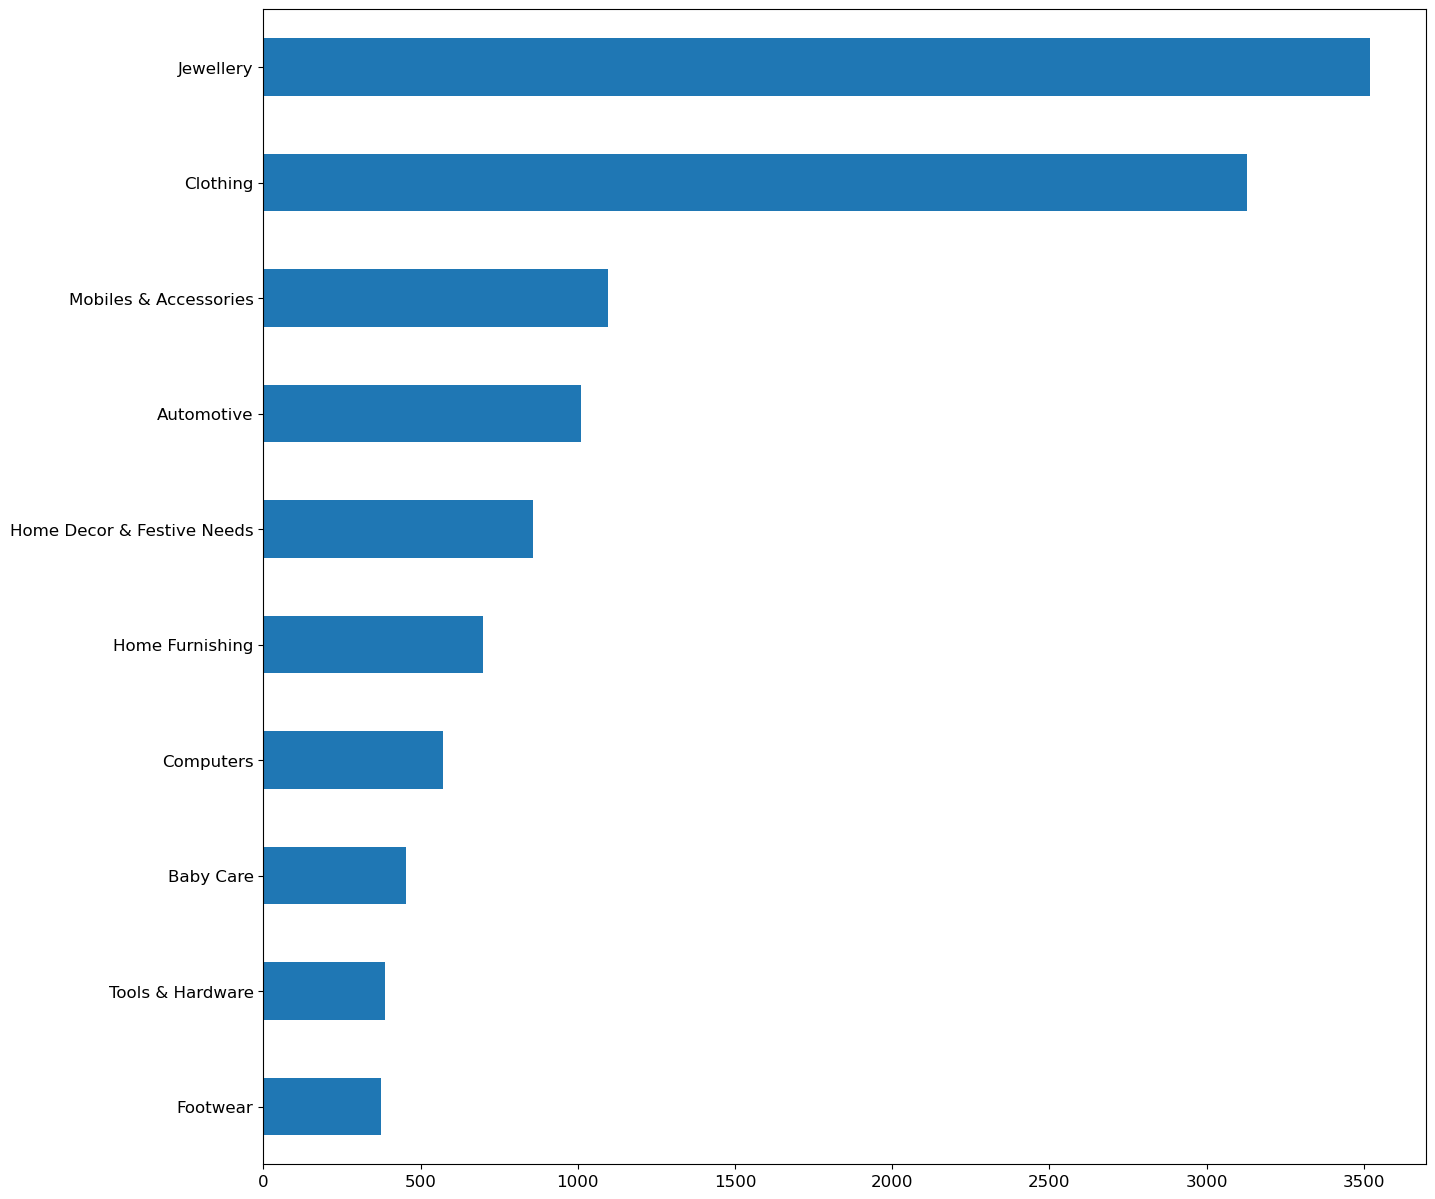

In [22]:
plt.figure(figsize=(15,15))
data['Labels'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

## 6.2 Lineplot represeanting the "is_FK_Advantage_product" and "Labels" entities

<AxesSubplot:xlabel='is_FK_Advantage_product', ylabel='Labels'>

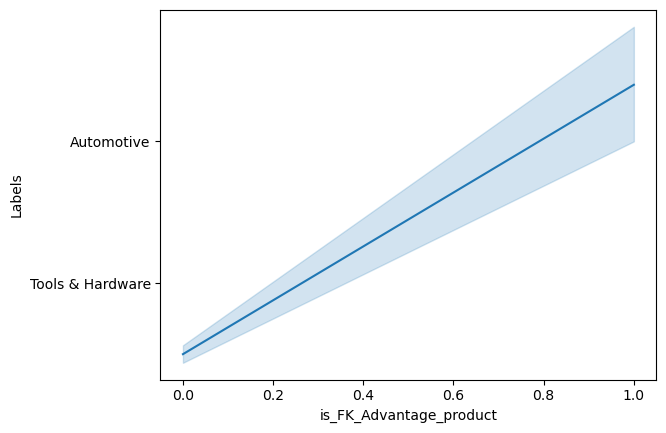

In [23]:
sns.lineplot(data['is_FK_Advantage_product'], data['Labels'])

## 6.3 Scatterplot for "retail_price" and "discounted_price"

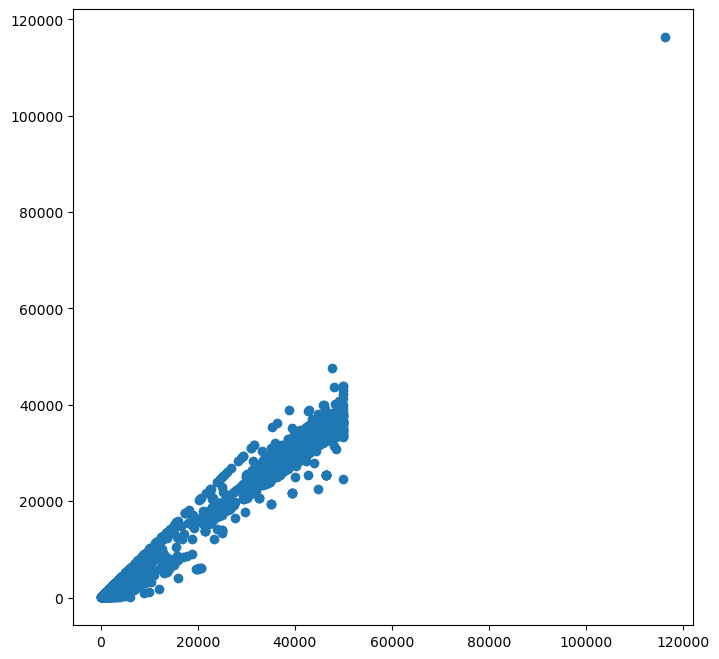

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(data['retail_price'],data['discounted_price'], cmap='rainbow')
plt.show()

## 6.4 Histogram for comparing the "Labels" on the basis of "is_FK_Advantage_product"

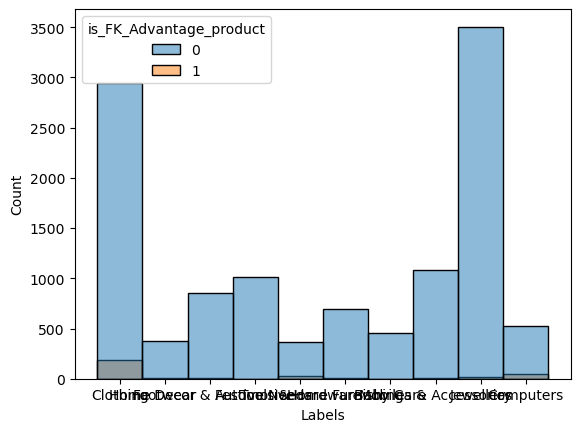

In [25]:
sns.histplot(x='Labels', data=data, kde=False, hue='is_FK_Advantage_product')
plt.show()

## 6.5 Heatmap

<AxesSubplot:>

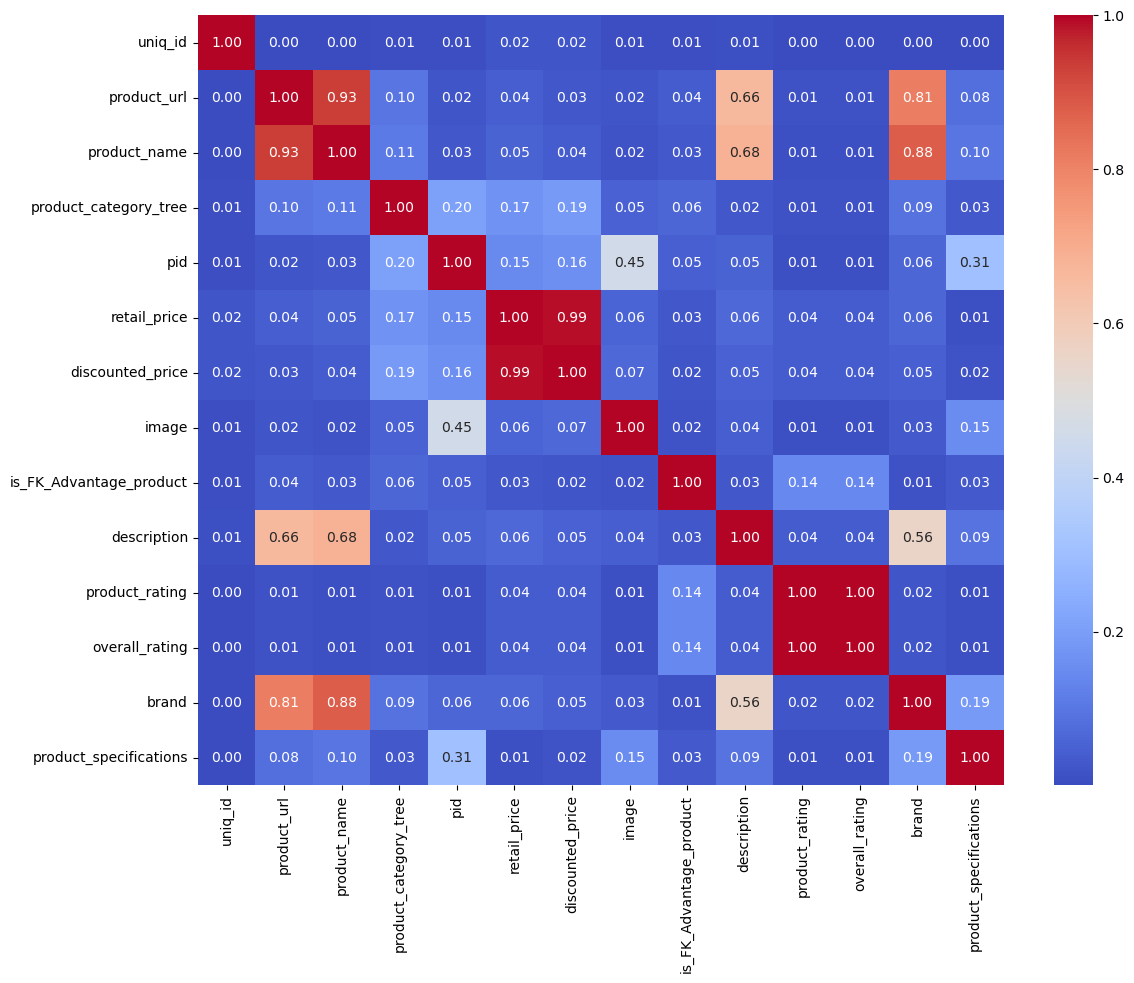

In [26]:
plt.figure(figsize=(13,10))
sns.heatmap(d.corr().abs(),annot=True, fmt = ".2f", cmap = "coolwarm")

# 7. Model training in Machine Learning

## 7.1 Defining the driver function

In [27]:
def train_models(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = metrics.accuracy_score(pred, y_test)
    confmat = confusion_matrix(y_test, pred)
    return model, acc, confmat

## 7.2 Naive Bayes


 ===================================== Evaluation on Multinomial Naive Bayes =====================================

Naive Bayes, Count Vectors:  0.6491324703938309
Naive Bayes, unigram Count Vectors: 0.6491324703938309
Naive Bayes, bigram Count Vectors: 0.6491324703938309
Naive Bayes, ngram Count Vectors: 0.6491324703938309
Naive Bayes, WordLevel TF-IDF: 0.6491324703938309
Naive Bayes, WordLevel bigram TF-IDF: 0.6491324703938309
Naive Bayes, WordLevel ngram TF-IDF: 0.6491324703938309
Naive Bayes, CharLevel ngram TF-IDF: 0.6174607546130543


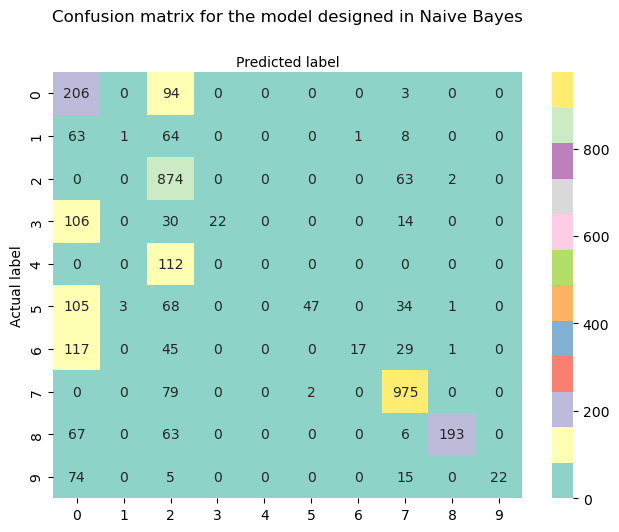

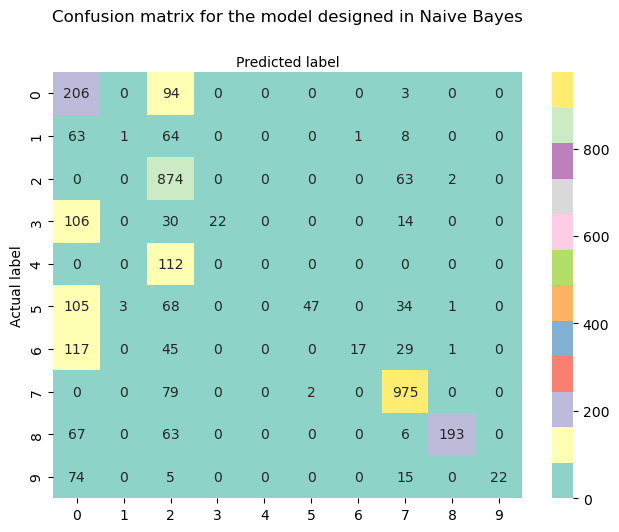

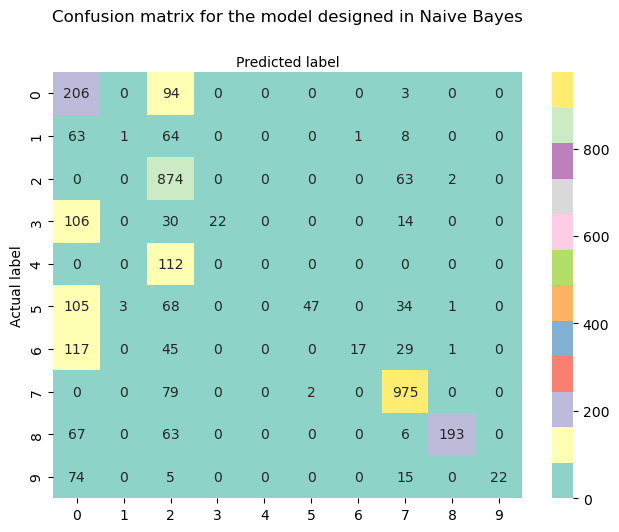

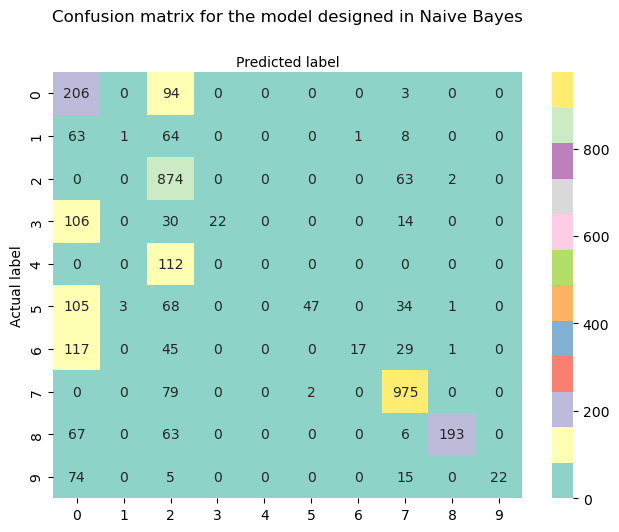

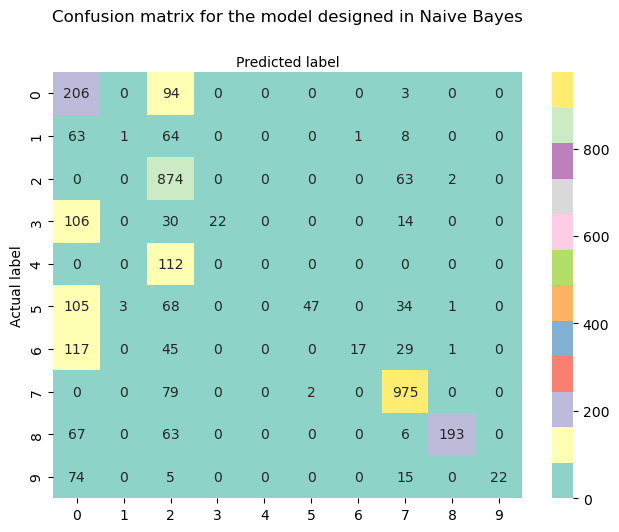

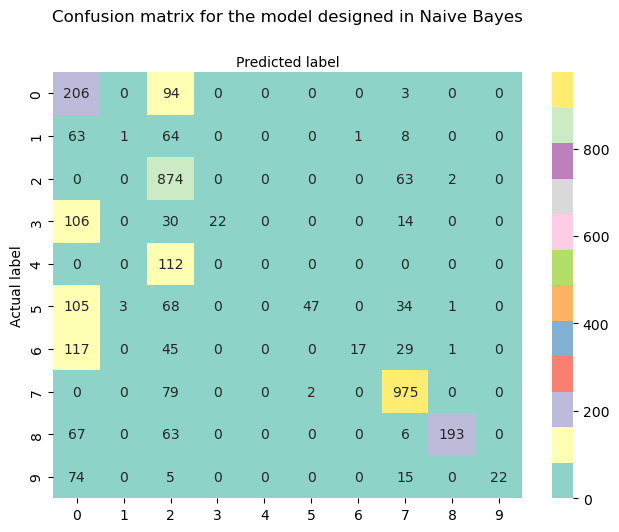

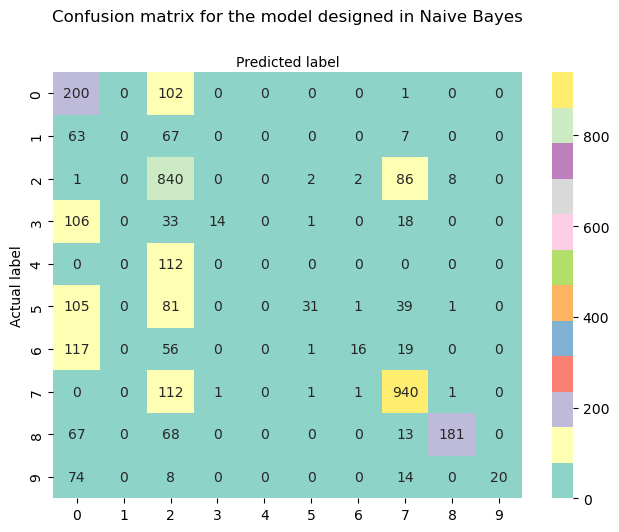

In [28]:
print("\n ===================================== Evaluation on Multinomial Naive Bayes =====================================\n")
# Model trained using the "Count Vectors"
NBmod1, NBacc1, NBconfmat1 = train_models(naive_bayes.MultinomialNB(), 
                            xtrain_count, xvalid_count, 
                            y_train, y_test)
print("Naive Bayes, Count Vectors: ", NBacc1)
classes=[0,1]
def plot_confusion_matrix(confmat, classes):
    fig, ax = plt.subplots()
    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes)
    plt.yticks(ticks, classes)
    sns.heatmap(pd.DataFrame(confmat), annot=True, cmap="Set3", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix for the model designed in Naive Bayes', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Model training and evaluation
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    confmat = confusion_matrix(y_test, y_pred)
    return model, accuracy, confmat

# Model 1: Naive Bayes with unigram using "Count Vectors"
NBmod1, NBacc1, NBconfmat1 = train_and_evaluate_model(naive_bayes.MultinomialNB(), 
                                                      xtrain_count, xvalid_count, 
                                                      y_train, y_test)
print("Naive Bayes, unigram Count Vectors:", NBacc1)
plot_confusion_matrix(NBconfmat1, [0, 1])

# Model 2: Naive Bayes with bigram using "Count Vectors"
NBmod2, NBacc2, NBconfmat2 = train_and_evaluate_model(naive_bayes.MultinomialNB(), 
                                                      xtrain_count_freq1, xvalid_count_freq1, 
                                                      y_train, y_test)
print("Naive Bayes, bigram Count Vectors:", NBacc2)
plot_confusion_matrix(NBconfmat2, [0, 1])

# Model 3: Naive Bayes with ngram using "Count Vectors"
NBmod3, NBacc3, NBconfmat3 = train_and_evaluate_model(naive_bayes.MultinomialNB(), 
                                                      xtrain_count_freq2, xvalid_count_freq2, 
                                                      y_train, y_test)
print("Naive Bayes, ngram Count Vectors:", NBacc3)
plot_confusion_matrix(NBconfmat3, [0, 1])

# Model 4: Naive Bayes with Word Level using "TF IDF Vectors"
NBmod4, NBacc4, NBconfmat4 = train_and_evaluate_model(naive_bayes.MultinomialNB(), 
                                                      xtrain_tfidf, xvalid_tfidf, 
                                                      y_train, y_test)
print("Naive Bayes, WordLevel TF-IDF:", NBacc4)
plot_confusion_matrix(NBconfmat4, [0, 1])

# Model 5: Naive Bayes with bigram Word Level using "TF IDF Vectors"
NBmod5, NBacc5, NBconfmat5 = train_and_evaluate_model(naive_bayes.MultinomialNB(), 
                                                      xtrain_tfidf_freq1, xvalid_tfidf_freq1, 
                                                      y_train, y_test)
print("Naive Bayes, WordLevel bigram TF-IDF:", NBacc5)
plot_confusion_matrix(NBconfmat5, [0, 1])

# Model 6: Naive Bayes with ngram Word Level using "TF IDF Vectors"
NBmod6, NBacc6, NBconfmat6 = train_and_evaluate_model(naive_bayes.MultinomialNB(), 
                                                      xtrain_tfidf_freq2, xvalid_tfidf_freq2, 
                                                      y_train, y_test)
print("Naive Bayes, WordLevel ngram TF-IDF:", NBacc6)
plot_confusion_matrix(NBconfmat6, [0, 1])

# Model 7: Naive Bayes with Character Level using "TF IDF Vectors"
NBmod7, NBacc7, NBconfmat7 = train_and_evaluate_model(naive_bayes.MultinomialNB(), 
                                                      xtrain_tfidf_freq2_str, xvalid_tfidf_freq2_str, 
                                                      y_train, y_test)
print("Naive Bayes, CharLevel ngram TF-IDF:", NBacc7)
plot_confusion_matrix(NBconfmat7, [0, 1])

## 7.3 Random Forest Classifier


 ===================================== Random Forest Classifier =====================================

Random Forest Classifier, Count Vectors:  0.6551914073258056
Random Forest Classifier, unigram Count Vectors: 0.6573946571192509
Random Forest Classifier, bigram Count Vectors: 0.6549160011016248
Random Forest Classifier, ngram Count Vectors: 0.6549160011016248
Random Forest Classifier, WordLevel TF-IDF: 0.6551914073258056
Random Forest Classifier, WordLevel bigram TF-IDF: 0.6576700633434316
Random Forest Classifier, WordLevel ngram TF-IDF: 0.6546405948774442
Random Forest Classifier, CharLevel ngram TF-IDF: 0.6543651886532635


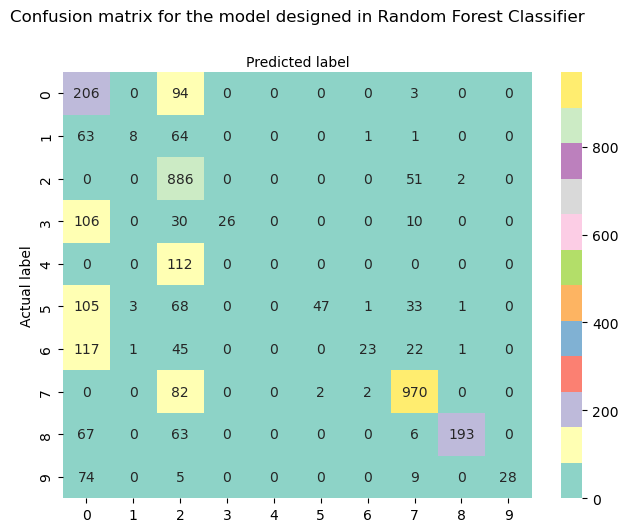

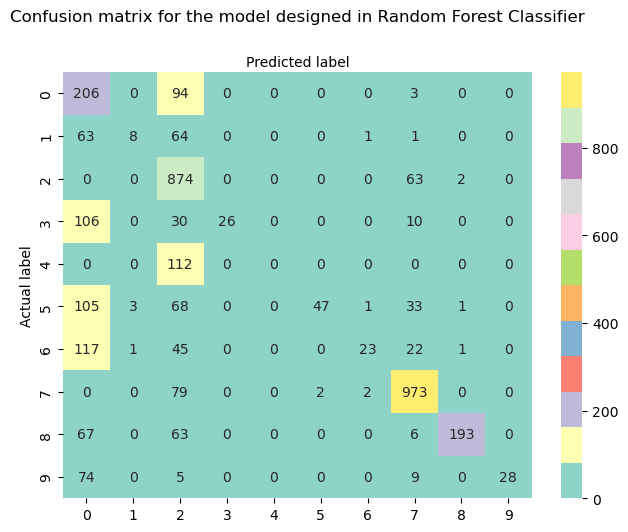

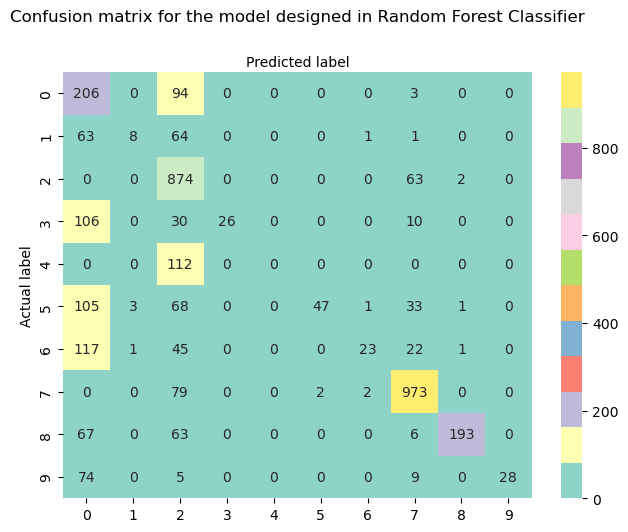

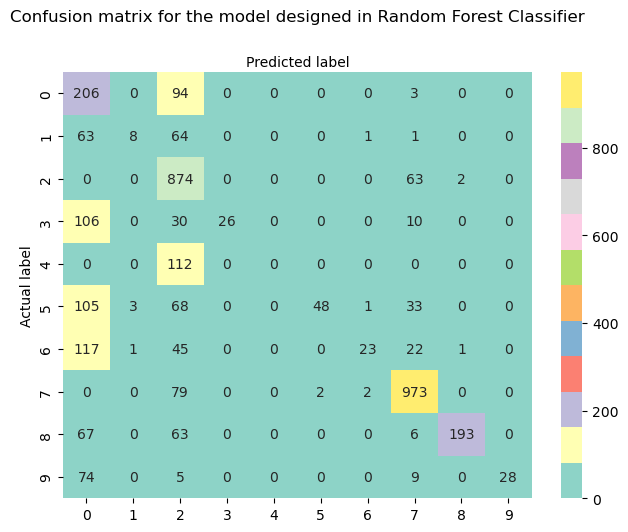

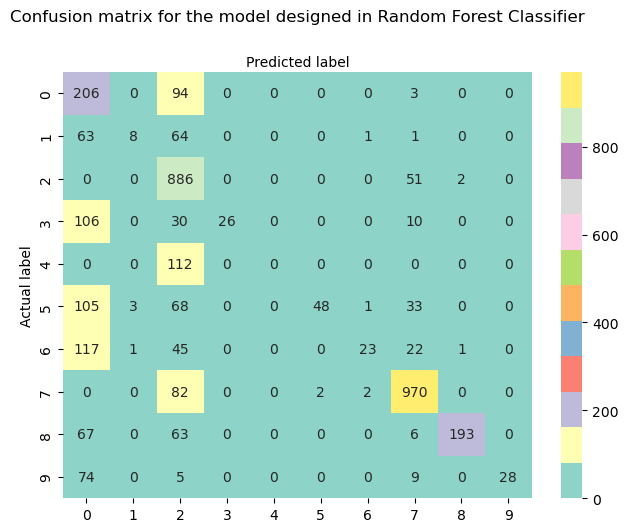

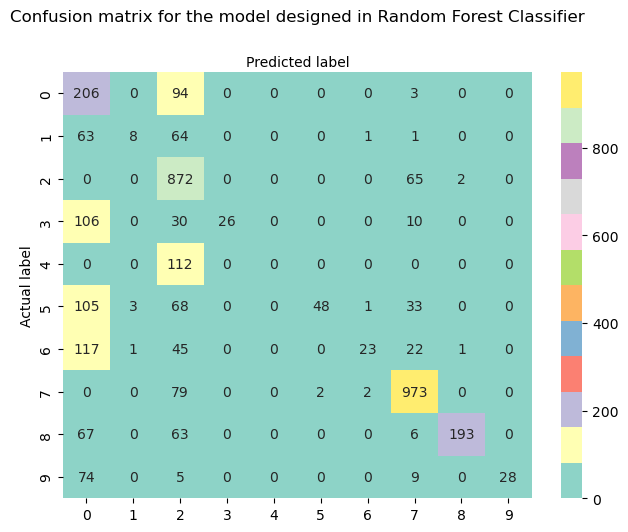

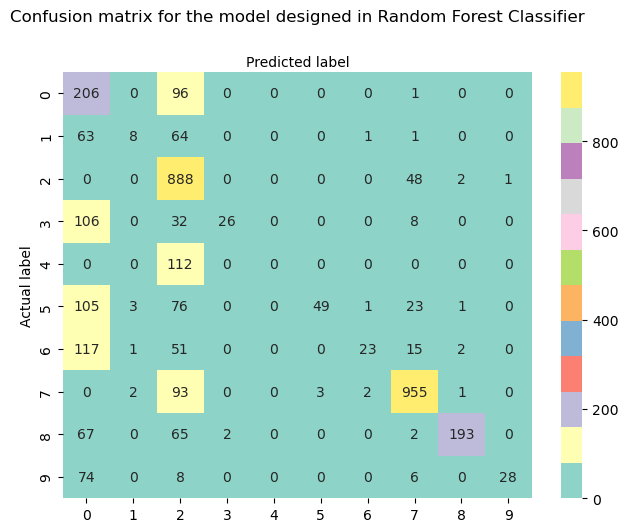

In [29]:
print("\n ===================================== Random Forest Classifier =====================================\n")
# Model trained using the "Count Vectors"
RFCmod1, RFCacc1, RFCconfmat1 = train_models(ensemble.RandomForestClassifier(n_estimators=100), 
                            xtrain_count, xvalid_count, 
                            y_train, y_test)
print("Random Forest Classifier, Count Vectors: ", RFCacc1)
classes=[0,1]
def plot_confusion_matrix(confmat, classes, model_name):
    fig, ax = plt.subplots()
    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes)
    plt.yticks(ticks, classes)
    sns.heatmap(pd.DataFrame(confmat), annot=True, cmap="Set3", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(f'Confusion matrix for the model designed in {model_name}', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Model training and evaluation
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    confmat = confusion_matrix(y_test, y_pred)
    return model, accuracy, confmat

# Model 1: Random Forest Classifier with unigram using "Count Vectors"
RFCmod1, RFCacc1, RFCconfmat1 = train_and_evaluate_model(ensemble.RandomForestClassifier(n_estimators=100), 
                                                          xtrain_count, xvalid_count, 
                                                          y_train, y_test, "Random Forest Classifier")
print("Random Forest Classifier, unigram Count Vectors:", RFCacc1)
plot_confusion_matrix(RFCconfmat1, [0, 1], "Random Forest Classifier")

# Model 2: Random Forest Classifier with bigram using "Count Vectors"
RFCmod2, RFCacc2, RFCconfmat2 = train_and_evaluate_model(ensemble.RandomForestClassifier(n_estimators=100), 
                                                          xtrain_count_freq1, xvalid_count_freq1, 
                                                          y_train, y_test, "Random Forest Classifier")
print("Random Forest Classifier, bigram Count Vectors:", RFCacc2)
plot_confusion_matrix(RFCconfmat2, [0, 1], "Random Forest Classifier")

# Model 3: Random Forest Classifier with ngram using "Count Vectors"
RFCmod3, RFCacc3, RFCconfmat3 = train_and_evaluate_model(ensemble.RandomForestClassifier(n_estimators=100), 
                                                          xtrain_count_freq2, xvalid_count_freq2, 
                                                          y_train, y_test, "Random Forest Classifier")
print("Random Forest Classifier, ngram Count Vectors:", RFCacc3)
plot_confusion_matrix(RFCconfmat3, [0, 1], "Random Forest Classifier")

# Model 4: Random Forest Classifier with Word Level using "TF IDF Vectors"
RFCmod4, RFCacc4, RFCconfmat4 = train_and_evaluate_model(ensemble.RandomForestClassifier(n_estimators=100), 
                                                          xtrain_tfidf, xvalid_tfidf, 
                                                          y_train, y_test, "Random Forest Classifier")
print("Random Forest Classifier, WordLevel TF-IDF:", RFCacc4)
plot_confusion_matrix(RFCconfmat4, [0, 1], "Random Forest Classifier")

# Model 5: Random Forest Classifier with bigram Word Level using "TF IDF Vectors"
RFCmod5, RFCacc5, RFCconfmat5 = train_and_evaluate_model(ensemble.RandomForestClassifier(n_estimators=100), 
                                                          xtrain_tfidf_freq1, xvalid_tfidf_freq1, 
                                                          y_train, y_test, "Random Forest Classifier")
print("Random Forest Classifier, WordLevel bigram TF-IDF:", RFCacc5)
plot_confusion_matrix(RFCconfmat5, [0, 1], "Random Forest Classifier")

# Model 6: Random Forest Classifier with ngram Word Level using "TF IDF Vectors"
RFCmod6, RFCacc6, RFCconfmat6 = train_and_evaluate_model(ensemble.RandomForestClassifier(n_estimators=100), 
                                                          xtrain_tfidf_freq2, xvalid_tfidf_freq2, 
                                                          y_train, y_test, "Random Forest Classifier")
print("Random Forest Classifier, WordLevel ngram TF-IDF:", RFCacc6)
plot_confusion_matrix(RFCconfmat6, [0, 1], "Random Forest Classifier")

# Model 7: Random Forest Classifier with Character Level using "TF IDF Vectors"
RFCmod7, RFCacc7, RFCconfmat7 = train_and_evaluate_model(ensemble.RandomForestClassifier(n_estimators=100), 
                                                          xtrain_tfidf_freq2_str, xvalid_tfidf_freq2_str, 
                                                          y_train, y_test, "Random Forest Classifier")
print("Random Forest Classifier, CharLevel ngram TF-IDF:", RFCacc7)
plot_confusion_matrix(RFCconfmat7, [0, 1], "Random Forest Classifier")

# 8. Named Entity Recognition

In [30]:
dat = pd.read_csv(r'flipkart_com-ecommerce_sample.csv')

sentence = dat.loc[1]['description']

for sent in nltk.sent_tokenize(sentence):
  for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
     if hasattr(chunk, 'label'):
        print(chunk.label(), ' '.join(c[0] for c in chunk))

ORGANIZATION FabHomeDecor
PERSON Fabric Double Sofa Bed
ORGANIZATION Finish Color
PERSON Leatherette Black Mechanism Type
PERSON Pull Out
PERSON Sofa Bed
PERSON Double
PERSON Sofa Bed
ORGANIZATION FabHomeDecor Fabric Double Sofa Bed
ORGANIZATION Finish Color
PERSON Leatherette Black Mechanism Type
PERSON Pull Out
ORGANIZATION Demo Installation
ORGANIZATION Demo Details Installation
PERSON Brand FabHomeDecor Mattress
PERSON Modern Filling Material
PERSON Shape Square Suitable
PERSON Living Room Model
GPE Avoid
PERSON Keep
PERSON Vacuum
PERSON Avoid
GPE Avoid
PERSON Keep
PERSON Vacuum
PERSON Try
PERSON Type Matte Important Note
PERSON Warranty Covered
GPE Warranty
GPE Service
PERSON Type Manufacturer Warranty Warranty
PERSON Months Domestic Warranty
GPE Warranty
PERSON Improper Handling Dimensions
ORGANIZATION Disclaimer
GPE Please
GPE Please
GPE Please
GPE Flipkart
ORGANIZATION Seller
PERSON Color Upholstery Color Leatherette Black
PERSON Fabric Secondary Material Subtype Mango Wood


# 9. Model Comparison

In [31]:
NB = {
    'Model Name': ['Model trained using the Count Vectors', 'Model trained on the bigram using the Count Vectors', 
                   'Model trained on the ngram using the Count Vectors', 'Model trained on the Word Level using the TF IDF Vectors', 
                   'Model trained on the Word Level using the bigram TF IDF Vectors', 'Model trained on the Ngram Level using the TF IDF Vectors', 'Model trained on the Character Level using the TF IDF Vectors'],
        'Accuracy Scores': [NBacc1, NBacc2, NBacc3, 
                            NBacc4, NBacc5, NBacc6, NBacc7]
}

In [32]:
Model_In_NB = pd.DataFrame(NB)
Model_In_NB

,Model Name,Accuracy Scores
0,Model trained using the Count Vectors,0.649132
1,Model trained on the bigram using the Count Ve...,0.649132
2,Model trained on the ngram using the Count Vec...,0.649132
3,Model trained on the Word Level using the TF I...,0.649132
4,Model trained on the Word Level using the bigr...,0.649132
5,Model trained on the Ngram Level using the TF ...,0.649132
6,Model trained on the Character Level using the...,0.617461


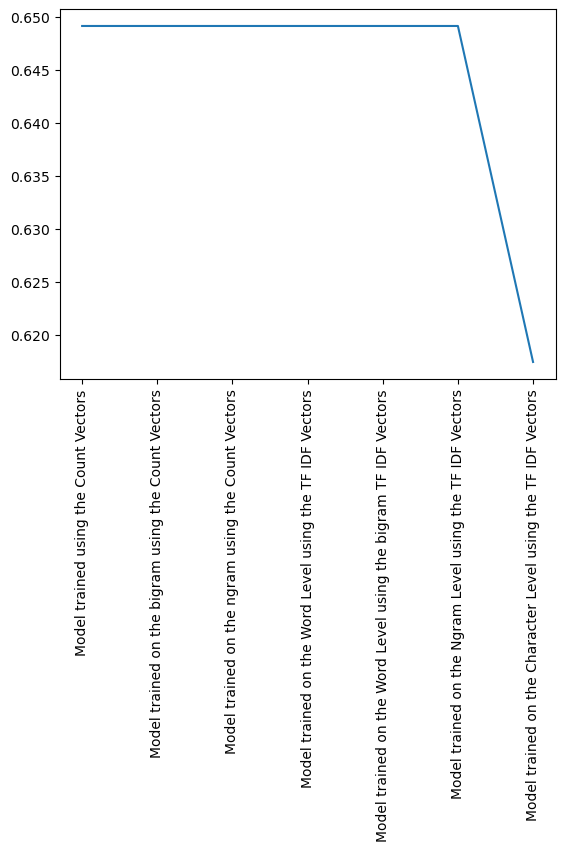

In [33]:
plt.plot(Model_In_NB['Model Name'], Model_In_NB['Accuracy Scores'])
plt.xticks(rotation='vertical')
plt.show()

In [34]:
RFC = {
    'Model Name': ['Model trained using the Count Vectors', 'Model trained on the bigram using the Count Vectors', 
                   'Model trained on the ngram using the Count Vectors', 'Model trained on the Word Level using the TF IDF Vectors', 
                   'Model trained on the Word Level using the bigram TF IDF Vectors', 'Model trained on the Ngram Level using the TF IDF Vectors', 'Model trained on the Character Level using the TF IDF Vectors'],
        'Accuracy Scores': [RFCacc1, RFCacc2, RFCacc3, 
                            RFCacc4, RFCacc5, RFCacc6, RFCacc7]
}

In [35]:
Model_In_RFC = pd.DataFrame(RFC)
Model_In_RFC

,Model Name,Accuracy Scores
0,Model trained using the Count Vectors,0.657395
1,Model trained on the bigram using the Count Ve...,0.654916
2,Model trained on the ngram using the Count Vec...,0.654916
3,Model trained on the Word Level using the TF I...,0.655191
4,Model trained on the Word Level using the bigr...,0.657670
5,Model trained on the Ngram Level using the TF ...,0.654641
6,Model trained on the Character Level using the...,0.654365


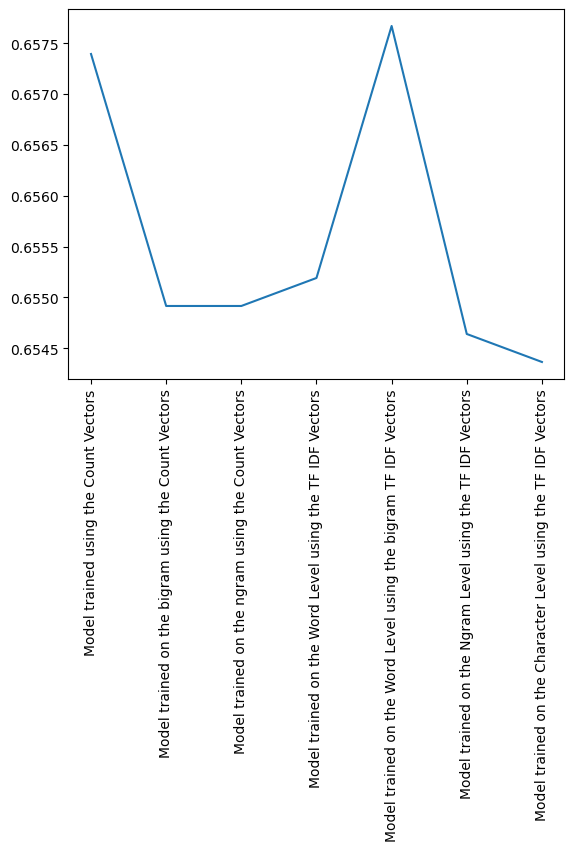

In [36]:
plt.plot(Model_In_RFC['Model Name'], Model_In_RFC['Accuracy Scores'])
plt.xticks(rotation='vertical')
plt.show()